In [1]:
import json
from pycocotools.coco import COCO

In [2]:
path = "./data/result.json"
f = open(path)
anns = json.load(f)
anns.keys()

dict_keys(['images', 'categories', 'annotations', 'info'])

In [3]:
anns["categories"]

[{'id': 0, 'name': 'Bird'}, {'id': 1, 'name': 'Drone'}]

In [4]:

ann_file = "./data/result.json"
coco=COCO(ann_file)
 
category_ids = coco.getCatIds(['Drone'])

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [5]:
image_ids = coco.getImgIds(catIds=[1])
print(image_ids[0:5])

[0, 2, 3, 6, 9]


In [6]:
annotation_ids = coco.getAnnIds(imgIds=[18], catIds=[0,1])
anns = coco.loadAnns(annotation_ids)
anns

[{'id': 31,
  'image_id': 18,
  'category_id': 1,
  'segmentation': [],
  'bbox': [115.27664670658683,
   566.0951526032317,
   196.21556886227552,
   142.13644524236986],
  'ignore': 0,
  'iscrowd': 0,
  'area': 27889.383459293276},
 {'id': 32,
  'image_id': 18,
  'category_id': 1,
  'segmentation': [],
  'bbox': [549.4035928143712,
   634.7127468581689,
   139.80359281437126,
   100.475763016158],
  'ignore': 0,
  'iscrowd': 0,
  'area': 14046.872660424215},
 {'id': 33,
  'image_id': 18,
  'category_id': 1,
  'segmentation': [],
  'bbox': [1165.0299401197608,
   686.1759425493715,
   85.8443113772455,
   53.913824057450626],
  'ignore': 0,
  'iscrowd': 0,
  'area': 4628.1950999258215},
 {'id': 34,
  'image_id': 18,
  'category_id': 1,
  'segmentation': [],
  'bbox': [1716.8862275449098,
   475.4219030520646,
   174.14131736526946,
   134.78456014362658],
  'ignore': 0,
  'iscrowd': 0,
  'area': 23471.560863909526}]

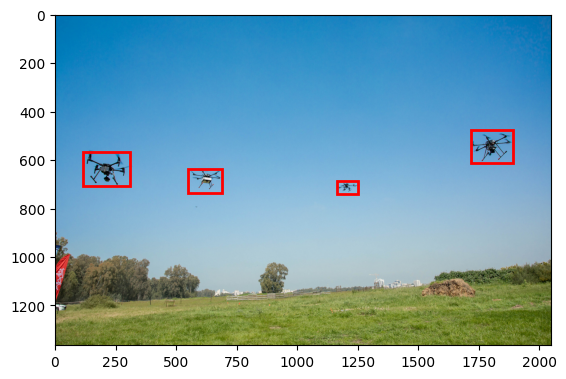

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
 
image_id = 18
 
images_path = "./data/images/"
image_name = "1ddf9f0c-Drones-during-todays-pilot-2.jpg" # Image names are 12 characters long
image = Image.open(images_path+image_name)
 
fig, ax = plt.subplots()
 
# Draw boxes and add label to each box
for ann in anns:
    box = ann['bbox']
    bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2, edgecolor="red", facecolor="none")
    ax.add_patch(bb)
 
ax.imshow(image)
plt.show()